In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf 
import numpy as np
import seaborn as sn
from datetime import timedelta, datetime
import datetime as dt

In [33]:
# 1) Import Data

portfolio_components = ["BRBY.L", "MEMS.PA", "K", "VIRP.PA"]
end_date = dt.datetime.now()
start_date = dt.datetime(2019, 1, 1)
portfolio = yf.download(portfolio_components, start=start_date, end=end_date)
portfolio

[*********************100%%**********************]  4 of 4 completed


Adj Close                                       Close  \
                 BRBY.L          K MEMS.PA     VIRP.PA       BRBY.L   
Date                                                                  
2019-01-02  1473.030640  43.137035   1.935  115.077049  1725.500000   
2019-01-03  1385.955078  43.213203   1.935  113.303604  1623.500000   
2019-01-04  1449.554443  43.639694   1.935  116.456390  1698.000000   
2019-01-07  1451.261841  43.845322   1.990  120.397385  1700.000000   
2019-01-08  1482.421265  44.089039   1.950  118.032799  1736.500000   
...                 ...        ...     ...         ...          ...   
2024-10-14   655.200012  80.629997   4.105  379.500000   655.200012   
2024-10-15   646.000000  80.930000   4.035  387.500000   646.000000   
2024-10-16   654.599976  81.059998   3.900  389.000000   654.599976   
2024-10-17   687.599976  81.019997   3.955  395.500000   687.599976   
2024-10-18   691.000000  81.050003   4.110  345.500000   691.000000   

                                                  High             ...  \
                    K MEMS.PA     VIRP.PA       BRBY.L          K  ...   
Date                                                               ...   
2019-01-02  53.183098   1.935  116.800003  1732.500000  53.615025  ...   
2019-01-03  53.276997   1.935  115.000000  1697.000000  53.615025  ...   
2019-01-04  53.802818   1.935  118.199997  1699.000000  54.093899  ...   
2019-01-07  54.056339   1.990  122.199997  1720.000000  54.234741  ...   
2019-01-08  54.356808   1.950  119.800003  1761.000000  54.460094  ...   
...               ...     ...         ...          ...        ...  ...   
2024-10-14  80.629997   4.105  379.500000   662.400024  80.699997  ...   
2024-10-15  80.930000   4.035  387.500000   659.400024  81.089996  ...   
2024-10-16  81.059998   3.900  389.000000   663.799988  81.209999  ...   
2024-10-17  81.019997   3.955  395.500000   694.400024  81.120003  ...   
2024-10-18  81.050003   4.110  345.500000   721.000000  81.070000  ...   

               Low                     Open                                 \
           MEMS.PA     VIRP.PA       BRBY.L          K MEMS.PA     VIRP.PA   
Date                                                                         
2019-01-02   1.935  111.800003  1715.500000  53.314552   2.000  112.599998   
2019-01-03   1.935  113.599998  1697.000000  53.098591   1.950  116.199997   
2019-01-04   1.935  115.599998  1653.000000  53.352112   1.935  115.599998   
2019-01-07   1.925  118.000000  1706.500000  53.596245   1.925  118.199997   
2019-01-08   1.900  119.400002  1698.000000  54.037560   1.985  122.199997   
...            ...         ...          ...        ...     ...         ...   
2024-10-14   4.030  376.500000   659.599976  80.550003   4.280  381.500000   
2024-10-15   4.010  378.500000   657.400024  80.680000   4.110  379.500000   
2024-10-16   3.805  379.000000   618.200012  80.809998   4.000  382.000000   
2024-10-17   3.810  390.000000   655.400024  81.019997   3.855  390.000000   
2024-10-18   3.990  345.500000   699.200012  81.050003   3.995  365.000000   

               Volume                               
               BRBY.L          K  MEMS.PA  VIRP.PA  
Date                                                
2019-01-02   927904.0  2391884.0  13287.0   6414.0  
2019-01-03  1469010.0  1799105.0   1460.0   5916.0  
2019-01-04  1654236.0  2020305.0      1.0   4163.0  
2019-01-07   929956.0  2055557.0   1442.0   7235.0  
2019-01-08  1317514.0  2309027.0   3006.0   5186.0  
...               ...        ...      ...      ...  
2024-10-14  2004909.0  1293500.0  13118.0   1670.0  
2024-10-15  2000590.0  1305900.0  10911.0   3751.0  
2024-10-16  3411882.0   808900.0  25529.0   2934.0  
2024-10-17  3309911.0  1205300.0  13268.0   4376.0  
2024-10-18  2097940.0  1643100.0   8104.0  26108.0  

[1501 rows x 24 columns]

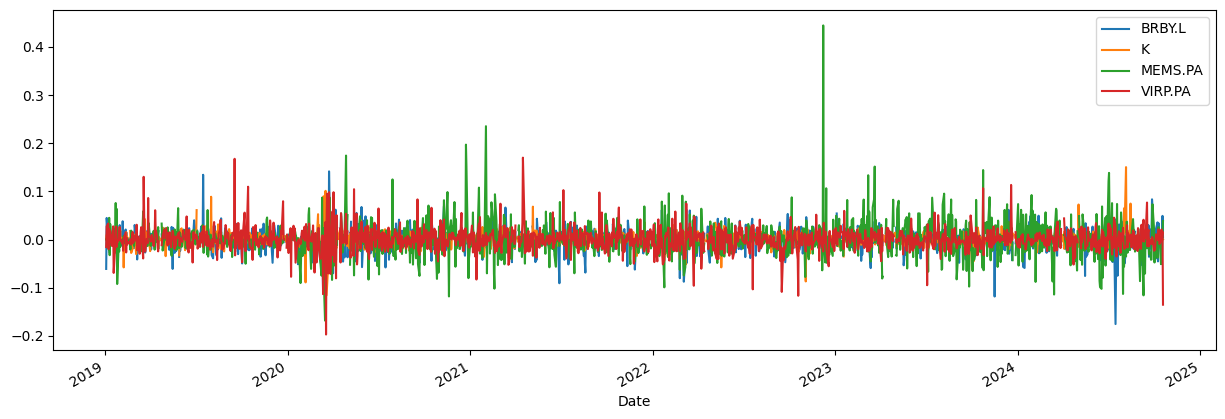

In [34]:
# 2) Compute returns via Log Returns and plot them

portfolio_return = np.log(portfolio["Adj Close"]/portfolio["Adj Close"].shift(1))
average_return = portfolio_return.mean(1)

portfolio_return_plot = portfolio_return.plot(figsize=(15,5))
plt.show()

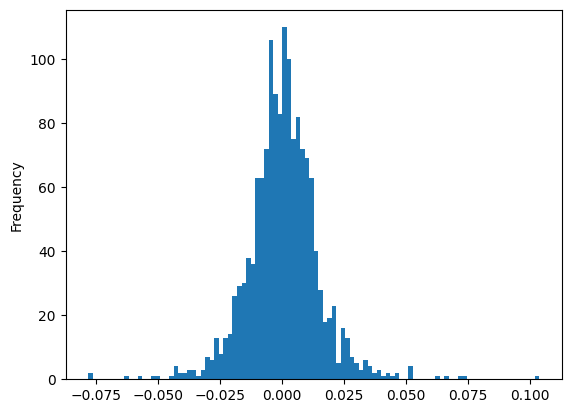

In [35]:
filtered_average_return = average_return[np.isfinite(average_return)]
filtered_average_return.plot.hist(bins=100)
plt.show()

In [36]:
# 3) Asset Allocation

weights = portfolio_return.sub(average_return, axis=0) * - 1
absolute_weights = weights.abs()
absolute_weights_sum = np.sum(absolute_weights, axis=1)
adjusted_weights = weights.div(absolute_weights_sum, axis=0).dropna()
adjusted_weights.tail(5)

,BRBY.L,K,MEMS.PA,VIRP.PA
Date,,,,
2024-10-14,-0.061519,-0.245188,0.500000,-0.193293
2024-10-15,0.222651,-0.096667,0.277349,-0.403333
2024-10-16,-0.282474,-0.090064,0.500000,-0.127462
2024-10-17,-0.500000,0.345796,0.098959,0.055245
2024-10-18,-0.123707,-0.103395,-0.272898,0.500000


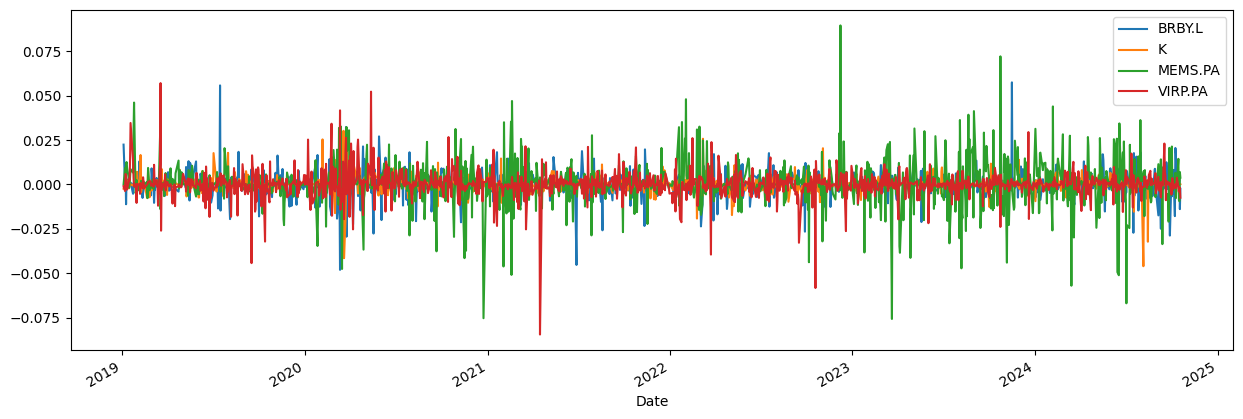

In [37]:
ptf_daily_return = (adjusted_weights.shift(1)*portfolio_return).dropna()
ptf_daily_return.plot(figsize=(15,5))
plt.show()

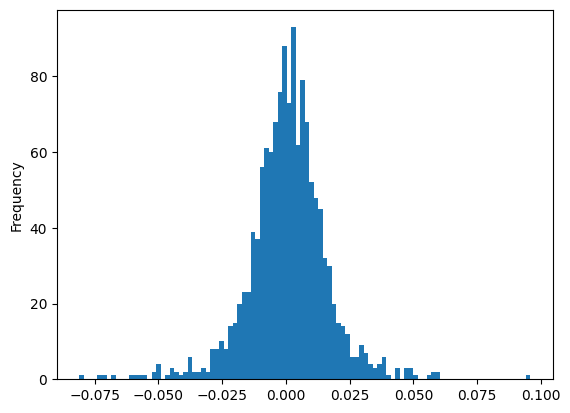

In [38]:
# 4) Strategy Returns 

daily_strategy_returns = np.sum(ptf_daily_return,axis=1)
daily_strategy_returns.plot.hist(bins=100)
plt.show()

In [39]:
annualized_returns = 252 * np.mean(daily_strategy_returns)
print(annualized_returns * 100, "%")

19.18980527901551 %


In [40]:
# 5) Sharpe Ratio

daily_strategy_returns_mean = np.mean(daily_strategy_returns)
daily_strategy_returns_std = np.std(daily_strategy_returns)

sharpe_ratio = np.sqrt(252) * daily_strategy_returns_mean / daily_strategy_returns_std
print(sharpe_ratio)

0.7727800591565286
